## Patient's Condition Classification Using Drug Reviews

### Project Goal

In this project, we aim to classify the conditions of patients using their reviews of drugs. The reviews are analyzed to predict the patient's condition and recommend the most suitable drugs. The dataset used for this project is available at the following link:

- **Dataset Link**: [Drug Review Dataset (Drugs.com)](https://archive.ics.uci.edu/dataset/462/drug+review+dataset+drugs+com)

### Data Description

The dataset contains reviews given by patients for various drugs. Below is a screenshot of the data description:

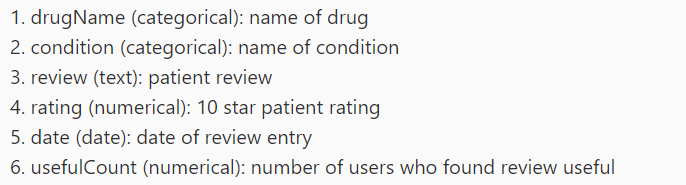


### Importing Libraries

In [3]:
import pandas as pd 
import itertools # for plotting confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
# its a tab seperated file hence will pass seperator 
review_df=pd.read_csv('../data/drugsComTrain_raw.tsv', sep='\t')


In [5]:
review_df.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [6]:
review_df.condition.value_counts()


Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

# Project Scope

## Selected Conditions
In this project, we will be focusing on the following four conditions:
1. **Birth Control** (majority of the data pertains to this condition)
2. **Depression**
3. **High Blood Pressure**
4. **Diabetes**

### Reason for Selection
The remaining three conditions have been selected because they are common diseases. The choice is based on their prevalence and relevance for our analysis.



In [7]:
df_train = review_df[(review_df['condition']=='Birth Control') | (review_df['condition']=='Depression') | (review_df['condition']=='High Blood Pressure')|(review_df['condition']=='Diabetes, Type 2')]

In [8]:
review_df.shape


(161297, 7)

In [9]:
df_train.shape


(42732, 7)

### Data Preparation

#### Columns to Retain
We will only keep the following columns in the dataset:
1. **Condition**
2. **Review**

#### Dropping Unnecessary Columns
The remaining columns will be dropped from the dataset to focus solely on the relevant information.



In [10]:
X = df_train.drop(['Unnamed: 0','drugName','rating','date','usefulCount'],axis=1)
#X = X.reset_index(drop=True)


In [11]:
X.head()

condition                                             review
2   Birth Control  "I used to take another oral contraceptive, wh...
3   Birth Control  "This is my first time using any form of birth...
9   Birth Control  "I had been on the pill for many years. When m...
11     Depression  "I have taken anti-depressants for years, with...
14  Birth Control  "Started Nexplanon 2 months ago because I have...

### Exploratory Data Analysis

In [12]:
X.condition.value_counts()


Birth Control          28788
Depression              9069
Diabetes, Type 2        2554
High Blood Pressure     2321
Name: condition, dtype: int64

### Handling Imbalanced Data

#### Observing Frequency Distribution
We will examine the frequency distribution of the conditions to identify the imbalance in the dataset. 

#### Imbalance Analysis
From the analysis, it is observed that:
- **Birth Control** has a significantly higher number of records compared to other conditions.
- Other conditions like **Depression**, **High Blood Pressure**, and **Diabetes** have relatively fewer records.

#### Actions
We might consider applying techniques to handle the class imbalance, such as:
- **Resampling** (oversampling the minority classes or undersampling the majority class)
- **Using Weighted Loss Functions** during model training


### Data Bifurcation and Word Cloud Visualization

##### Bifurcate Dataset
We will split the dataset into four subsets, each corresponding to one of the conditions:
1. **Birth Control**
2. **Depression**
3. **High Blood Pressure**
4. **Diabetes**

In [13]:
# segregating dataframe for analyzing individual condition
X_birth=X[(X['condition']=='Birth Control')]
X_dep=X[(X['condition']=='Depression')]
X_bp=X[(X['condition']=='High Blood Pressure')]
X_diab=X[(X['condition']=='Diabetes, Type 2')]

Text(0.5, 1.0, 'Word cloud for Birth control')

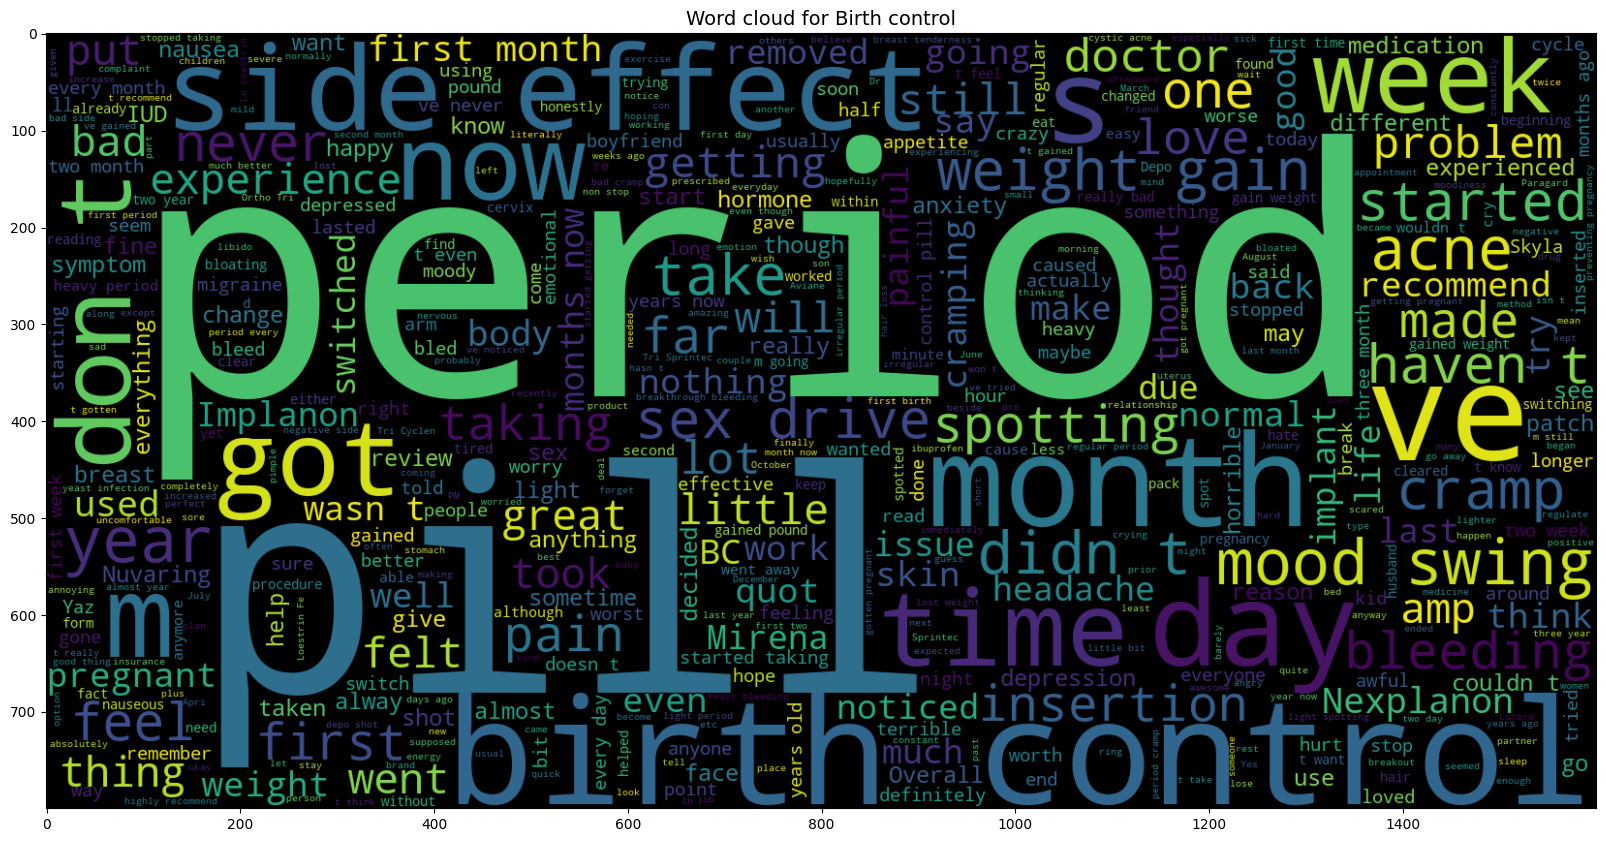

In [14]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_birth.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Birth control',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Depression')

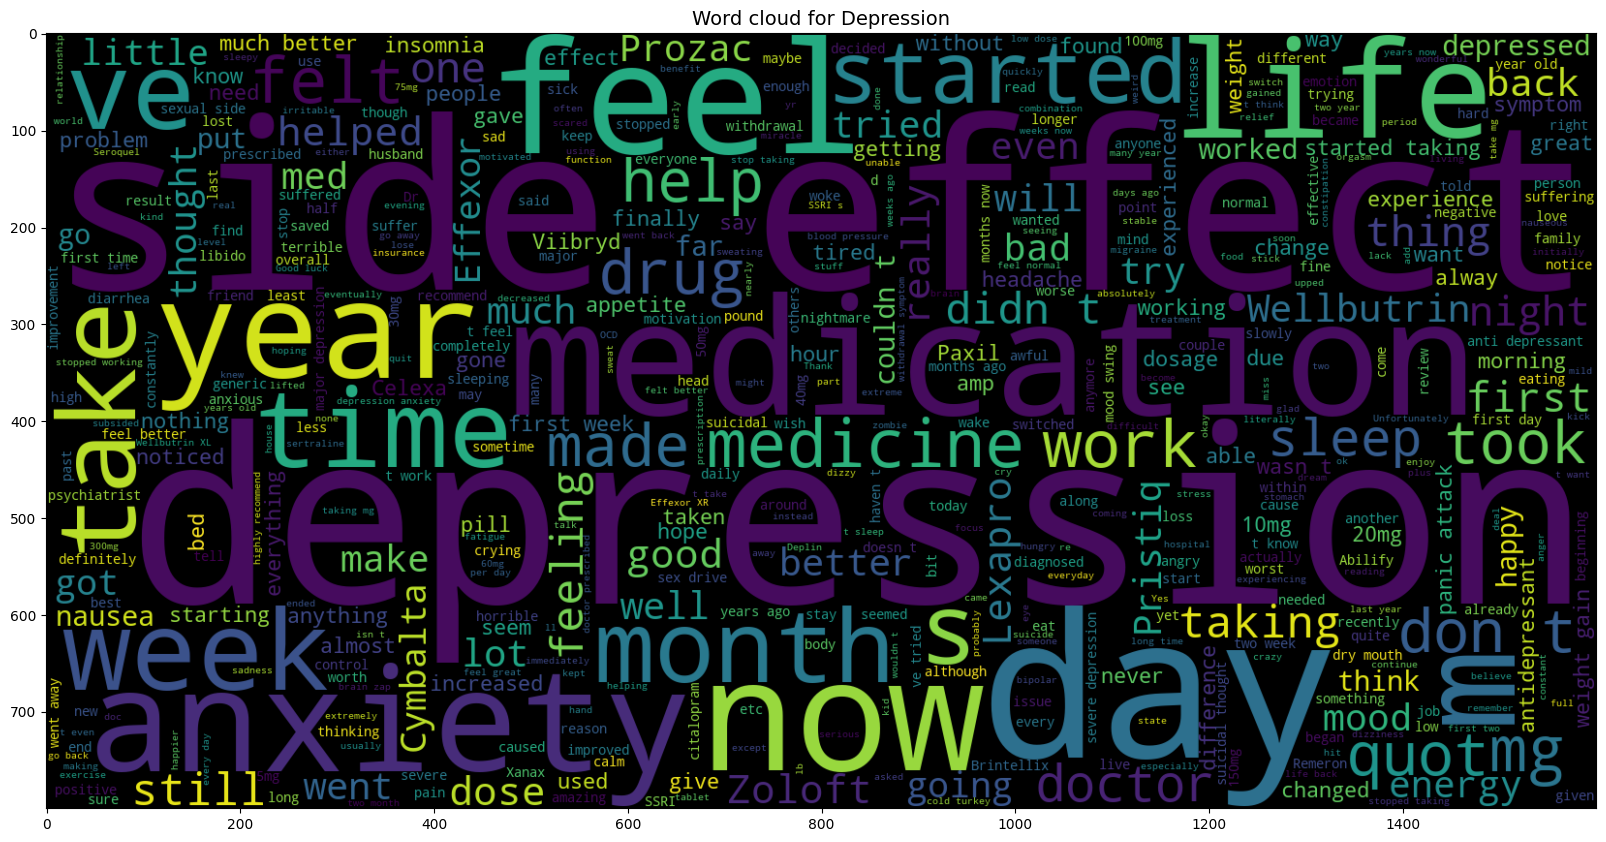

In [15]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_dep.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Depression',fontsize=14)

Text(0.5, 1.0, 'Word cloud for High Blood Pressure')

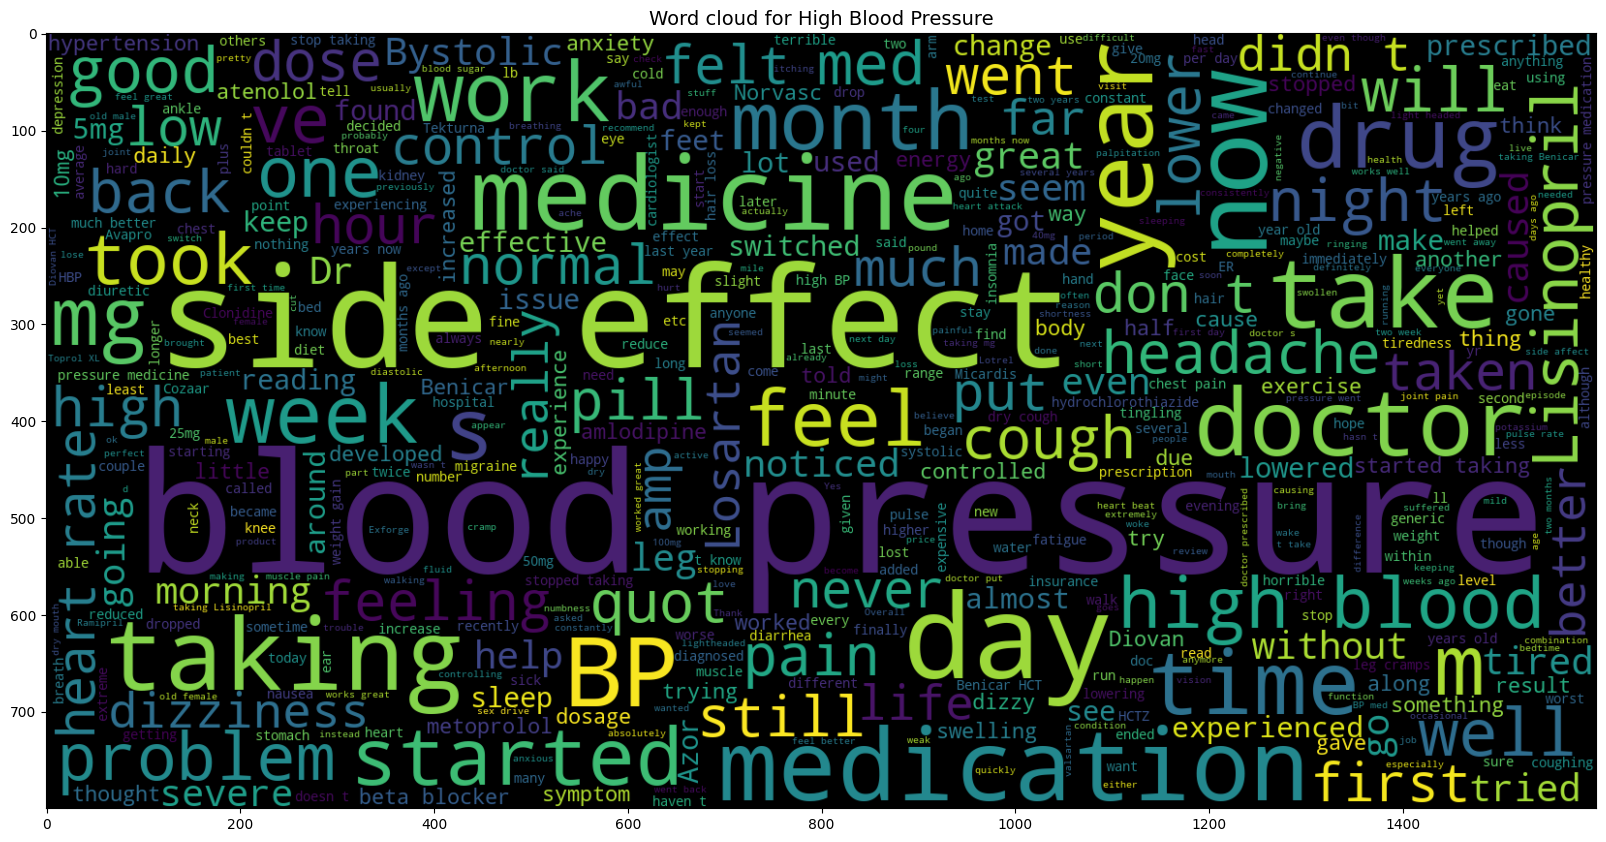

In [16]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_bp.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for High Blood Pressure',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Diabetes Type 2')

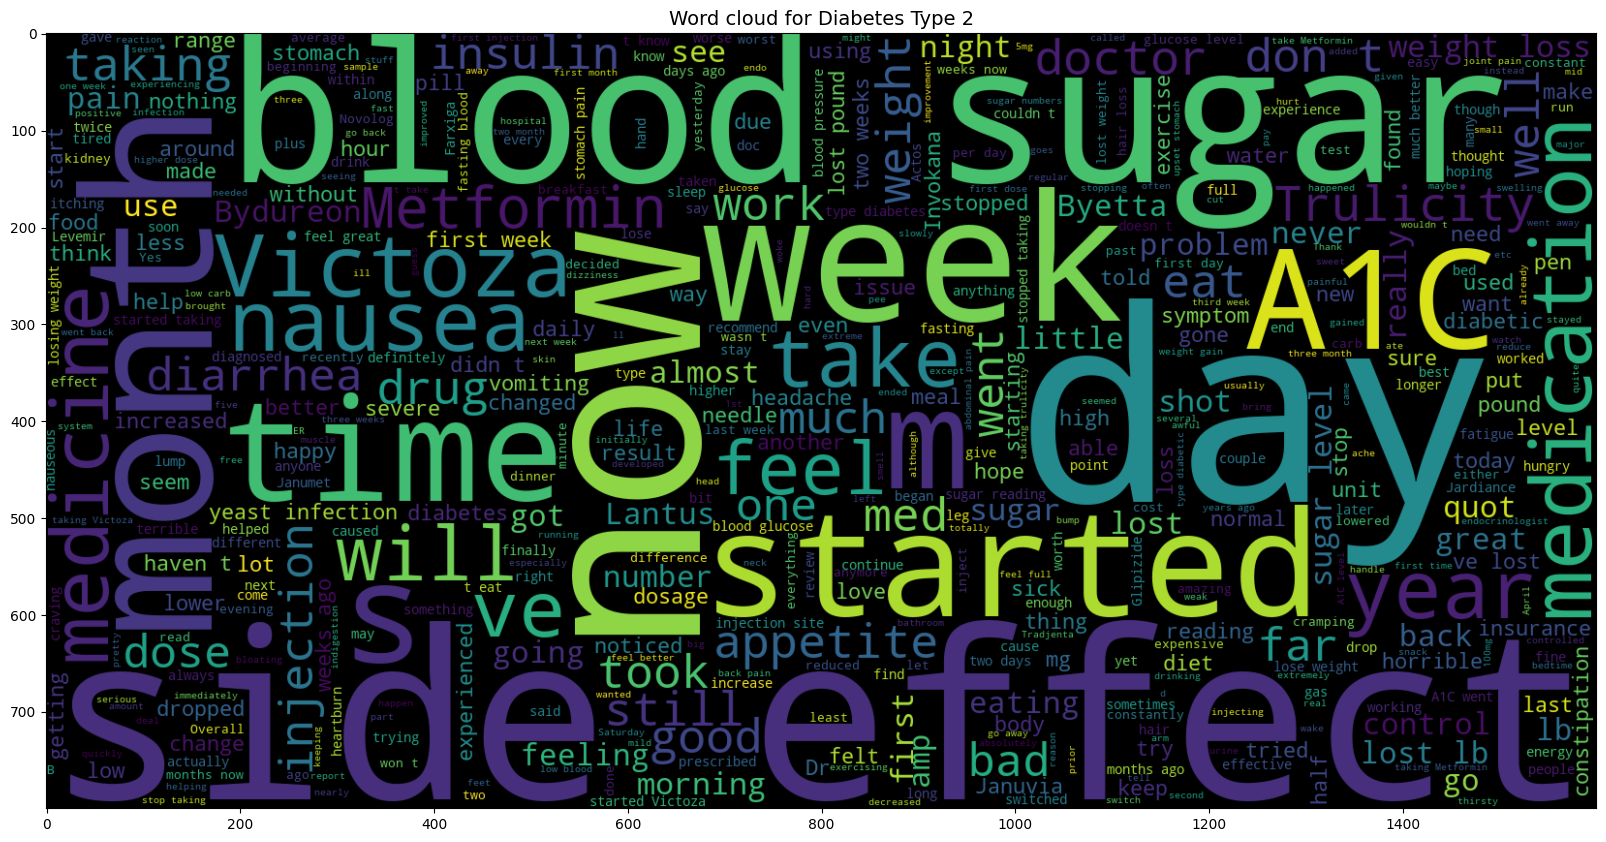

In [17]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_diab.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Diabetes Type 2',fontsize=14)

### Data Preprocessing

### Review Analysis and Further Preprocessing

#### Analyzing Individual Reviews
We will inspect some individual reviews to identify common issues that need correction. Common issues may include:
- **Typographical Errors:** Spelling mistakes or grammatical errors.
- **Inconsistent Formatting:** Variations in how reviews are written or structured.
- **Irrelevant Information:** Text that does not pertain to the condition or is not useful for analysis.

#### Corrective Actions
Based on the review analysis, we will perform the following preprocessing steps:
- **Text Normalization:** Convert text to lowercase, remove punctuation, and handle typos.
- **Text Cleaning:** Remove irrelevant information or noise.
- **Tokenization:** Break down text into words or phrases for further analysis.
- **Stop Words Removal:** Remove common words that do not contribute to the meaning of the text.
- **Stemming/Lemmatization:** Reduce words to their root form.

#### Further Preprocessing Work
After the initial cleaning, we will:
- **Reassess Data Distribution:** Ensure that the preprocessing has improved data consistency.
- **Update Data Representation:** Convert text data into numerical format using techniques like TF-IDF or word embeddings.


In [18]:
X['review'][3]


'"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"'

In [19]:
X['review'][14]


'"Started Nexplanon 2 months ago because I have a minimal amount of contraception&#039;s I can take due to my inability to take the hormone that is used in most birth controls. I&#039;m trying to give it time because it is one of my only options right now. But honestly if I had options I&#039;d get it removed.\r\nI&#039;ve never had acne problems in my life, and immediately broke out after getting it implanted. Sex drive is completely gone, and I used to have sex with my boyfriend a few days a week, now its completely forced and not even fun for me anymore. I mean I&#039;m on birth control because I like having sex but don&#039;t want to get pregnant, why take a birth control that takes away sex? Very unhappy and hope that I get it back with time or I&#039;m getting it removed."'

- few things need to be cleaned 
- like double quotes then certain symbols that are common need to be removed
- will remove stopword as well


In [20]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [21]:

# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

In [22]:
X['review'][14]


'Started Nexplanon 2 months ago because I have a minimal amount of contraception&#039;s I can take due to my inability to take the hormone that is used in most birth controls. I&#039;m trying to give it time because it is one of my only options right now. But honestly if I had options I&#039;d get it removed.\r\nI&#039;ve never had acne problems in my life, and immediately broke out after getting it implanted. Sex drive is completely gone, and I used to have sex with my boyfriend a few days a week, now its completely forced and not even fun for me anymore. I mean I&#039;m on birth control because I like having sex but don&#039;t want to get pregnant, why take a birth control that takes away sex? Very unhappy and hope that I get it back with time or I&#039;m getting it removed.'

### What are Stopwords?

- **Definition:** Stopwords are the most common words in a natural language. They often do not contribute significant meaning to the overall content of a document for NLP (Natural Language Processing) models.

- **Examples:** Common stopwords include words such as "the", "is", "in", "for", "where", "when", "to", "at", etc.

- **Purpose in NLP:** In the context of building NLP models, stopwords might not add much value to the document’s meaning. Therefore, they are often removed to focus on more meaningful terms.

- **Relevance to Text Analysis:**
  - **Sentiment Analysis/Text Classification:** In these tasks, it is crucial to focus on words that carry significant meaning and are important for classifying categories. Common words like "is" or "are" appear frequently across all categories and may not be useful for distinguishing between different classes.
  - **Text Preprocessing:** Removing stopwords helps to reduce the noise in the data and highlights unique and relevant words that play a more substantial role in text classification or sentiment analysis.

- **Objective:** By removing stopwords, we aim to keep unique words that are more indicative of the content and improve the performance of text-based models.


In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\saurabh.LAPTOP-
[nltk_data]     2HELHMCR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [25]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Lemmitization
- Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

### Stemming
- Stemming is the process of reducing a word to its word stem, base, or root form. The stem need not be identical to the morphological root of the word; it is usually a written form. The goal of stemming is to remove the inflectional endings of words to return the base or root form of the word, which might not be a real word.

In [26]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [27]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [28]:
# Download wordnet and omw-1.4 data
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\saurabh.LAPTOP-
[nltk_data]     2HELHMCR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\saurabh.LAPTOP-
[nltk_data]     2HELHMCR\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [29]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

In [30]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


### Lemmatization in Text Preprocessing

- **Definition:** Lemmatization is a process of reducing words to their base or root form, known as the "lemma". Unlike stemming, which may produce non-words or roots that are not actual words, lemmatization aims to produce valid words that are meaningful in the context of the language.

- **Purpose:** The main goal of lemmatization is to ensure that different forms of a word (e.g., "running", "runs", "ran") are converted to a single base form (e.g., "run"). This helps in consolidating similar terms and improves the accuracy of text analysis.

- **Advantages over Stemming:**
  - **Accuracy:** Lemmatization is more accurate because it considers the context and meaning of the word, producing the correct lemma based on its usage.
  - **Contextual Meaning:** By reducing words to their correct base form, lemmatization preserves the actual meaning and helps in maintaining the integrity of the text.

- **Application:** In text preprocessing, especially for tasks like sentiment analysis or text classification, lemmatization helps in standardizing words to their root forms, reducing redundancy, and focusing on the core meaning of the text.

- **Summary:** For our project, we will use lemmatization to ensure that we achieve a more accurate representation of the text, improving the quality of the analysis and model performance.


In [31]:
from bs4 import BeautifulSoup
import re # used when we need to substitute symbols to words or vice versa

### Why Using Beautiful Soup?

- **Context:** The drug reviews we are working with are extracted from the website `drugs.com`. When scraping reviews from such websites, the data often includes HTML elements that need to be cleaned for proper analysis.

- **Issue:** The scraped reviews may contain HTML tags and special characters that are not relevant to the text content. These elements can interfere with text analysis and result in inaccurate insights.

- **Solution:** To clean the reviews and remove unwanted HTML elements, we will use Beautiful Soup. Beautiful Soup is a Python library specifically designed for parsing HTML and XML documents.

- **Advantages of Beautiful Soup:**
  - **HTML Parsing:** Beautiful Soup allows us to parse HTML content and extract only the text, eliminating any HTML tags and special characters.
  - **Ease of Use:** The library provides an intuitive and straightforward API for navigating and modifying the parse tree of HTML documents.
  - **Data Cleaning:** By removing HTML elements, we ensure that the reviews are in a clean and usable format, improving the quality of subsequent text analysis.

- **Summary:** Using Beautiful Soup will help us preprocess the reviews by stripping out HTML elements, allowing us to focus on the actual text content for accurate analysis and model training.


In [32]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text) # if not letter instead special character will replace that with space
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop] # used list comprehension to remove all stopwords
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [33]:
X['review_clean'] = X['review'].apply(review_to_words)


In [34]:
X.head()


condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11  Depression      
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
2   I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.                                  
3   This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch                                                                                                                                                                                                                                                                                                                                                       
9   I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.                                                      
11  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.                                                                                                                                                                                                                                           

### Creating Data for Model

In [35]:
X_feat=X['review_clean']
y=X['condition']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)


### Multiple Class Classification

- **Context:** In our project, we are dealing with a classification problem where the goal is to categorize text reviews into multiple predefined categories.

- **Task:** Specifically, we are working with reviews related to different medical conditions such as Birth Control, Depression, High Blood Pressure, and Diabetes.

- **Challenge:** Multiple class classification involves predicting the category of a given input from among three or more possible classes. This is different from binary classification, where there are only two possible outcomes.

- **Approach:** 
  - **Feature Extraction:** We will preprocess the text reviews by removing stopwords, performing lemmatization, and cleaning HTML elements to ensure that the features used for classification are relevant and meaningful.
  - **Model Training:** We will use machine learning algorithms suitable for multiple class classification, such as Logistic Regression, Random Forest, or Support Vector Machines, to train our model.
  - **Evaluation:** We will evaluate our model using metrics like accuracy, precision, recall, and F1-score to assess its performance in classifying reviews into the correct categories.

- **Objective:** The goal is to build an accurate and reliable classification model that can effectively categorize text reviews into the specified medical conditions.


In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    see full source and example
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matric
    normalization can be applied by setting `normalize=True`
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Bag of Words Model

- **Definition:** The Bag of Words (BoW) model is a simple and commonly used method for text representation in Natural Language Processing (NLP). It converts text into numerical features by representing each document as a collection of words, ignoring the order and grammar of the words.

- **Process:**
  1. **Tokenization:** Split the text into individual words or tokens.
  2. **Vocabulary Creation:** Build a vocabulary of all unique words present in the dataset.
  3. **Feature Vector:** Represent each document as a vector based on the frequency of words from the vocabulary. Each dimension of the vector corresponds to a word in the vocabulary, and the value represents the count or frequency of that word in the document.

- **Example:**
  - **Text 1:** "The cat sat on the mat."
  - **Text 2:** "The dog sat on the log."
  
  **Vocabulary:** ["The", "cat", "sat", "on", "mat", "dog", "log"]
  
  **Feature Vector for Text 1:** [2, 1, 1, 1, 1, 0, 0]
  **Feature Vector for Text 2:** [2, 0, 1, 1, 0, 1, 1]

- **Advantages:**
  - Simple to implement and understand.
  - Effective for many text classification tasks.

- **Disadvantages:**
  - Ignores word order and grammar.
  - Can lead to high-dimensional feature space with large vocabularies.
  - May not capture semantic meaning or context of words.

- **Use Case:** The Bag of Words model is often used as a baseline for text classification tasks and can be combined with other techniques for more sophisticated text analysis.


In [38]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [39]:
count_train

<34185x15995 sparse matrix of type '<class 'numpy.int64'>'
	with 1092752 stored elements in Compressed Sparse Row format>

- **Output:** The result of the Bag of Words model is a sparse matrix where:
  - **Columns:** Each column represents a unique word from the entire vocabulary.
  - **Rows:** Each row corresponds to a document (or review) in the dataset.
  
  In this matrix:
  - Each entry (cell) represents the frequency or presence of a word in a specific document.
  - Since the vocabulary can be very large and many words may not appear in every document, this matrix is often sparse, meaning it contains a lot of zero values where words are not present.

- **Example:**
  Suppose we have a vocabulary with the words ["cat", "dog", "sat", "mat"] and two documents:
  - **Document 1:** "The cat sat on the mat."
  - **Document 2:** "The dog sat on the log."

  The sparse matrix might look like this:
  
  |           | cat | dog | sat | mat |
  |-----------|-----|-----|-----|-----|
  | **Doc 1** |  1  |  0  |  1  |  1  |
  | **Doc 2** |  0  |  1  |  1  |  0  |

  Here:
  - **Doc 1:** Contains "cat", "sat", and "mat" but not "dog".
  - **Doc 2:** Contains "dog" and "sat" but not "cat" or "mat".


### Machine Learning Model: Naive Bayes

#### Model Selection
We will use the **Multinomial Naive Bayes** model for this project.

#### Steps
1. **Fit the Model**: The model will be trained using `count_train` and `y_train`.
2. **Prediction**: After fitting, the model will be used to make predictions.
3. **Validation**: The model's performance will be validated using the accuracy score.



accuracy:   0.970
Confusion matrix, without normalization


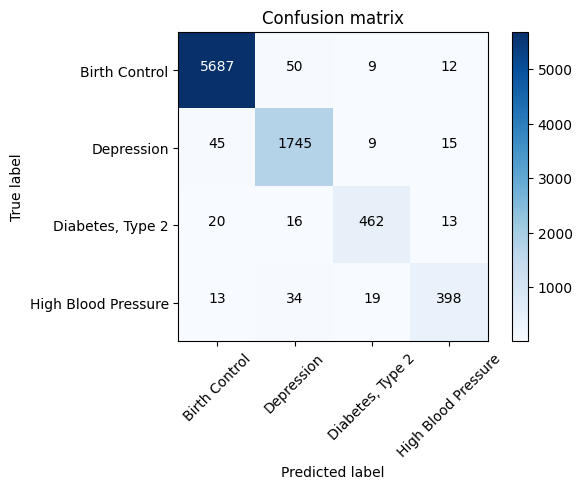

In [40]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])



### Model Performance and Next Steps

#### Model Performance
By using a simple Bag of Words model with **Multinomial Naive Bayes**, we achieved an accuracy of **97%**.

#### Next Steps
Next, we will use the **Passive Aggressive Classifier**. This model is more advanced compared to Multinomial Naive Bayes and may offer improved performance.


### Machine Learning Model : Passive Aggressive Classifier

accuracy:   0.978
Confusion matrix, without normalization


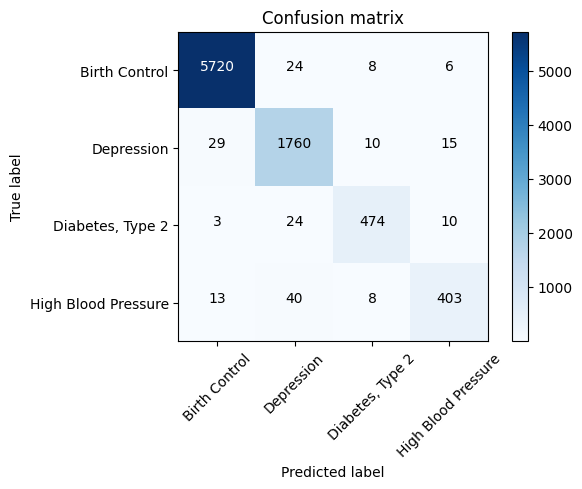

In [41]:
passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])


### Model Performance and Confusion Matrix Analysis

#### Model Performance
Using the **Passive Aggressive Classifier**, we achieved an accuracy of **97.8%**.

#### Confusion Matrix Analysis
- The **confusion matrix** shows that **Birth Control** has the highest number of predictions. This is expected as most of the classes in the dataset are related to Birth Control.
- However, there are some misclassifications:
  - For instance, there are **29 cases** where the model predicted **Birth Control**, but the actual condition was **Depression**.
  - Similar misclassifications are observed in other cases as well.

#### Conclusion
The Passive Aggressive Classifier has slightly improved accuracy compared to the Multinomial Naive Bayes model, but there are still some misclassifications that need to be addressed.


### Vectorization with TF-IDF

- **TF-IDF (Term Frequency-Inverse Document Frequency)** is a more advanced technique compared to the **Bag of Words** model.
- **TF-IDF** improves upon the Bag of Words model by considering not only the frequency of words but also how unique or important they are within the corpus.
- This technique helps in better representing the text data by reducing the impact of common words and emphasizing more relevant terms.


In [42]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

### Machine Learning Model : Naive Bayes


accuracy:   0.921
Confusion matrix, without normalization


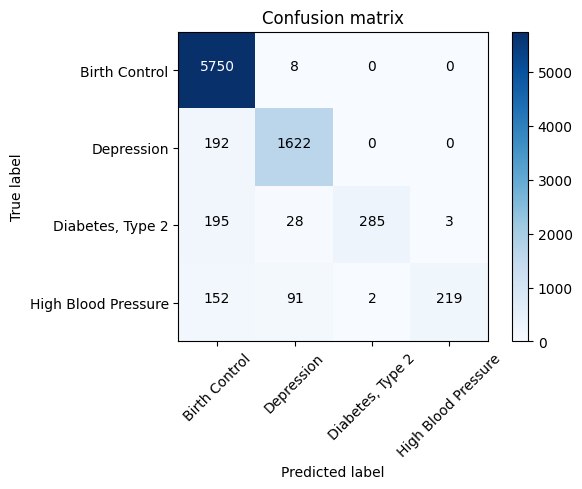

In [43]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])


### Accuracy with Naive Bayes and TF-IDF

- **Naive Bayes** with **TF-IDF** vectorization resulted in a significant decrease in accuracy compared to the Bag of Words model.
- This drop in performance might be due to various factors, including the choice of vectorization method and the characteristics of the TF-IDF representation.
- Further tuning and analysis might be needed to optimize the model's performance with TF-IDF vectorization.


### Machine Learning Model: Passive Aggressive Classifier


accuracy:   0.982
Confusion matrix, without normalization


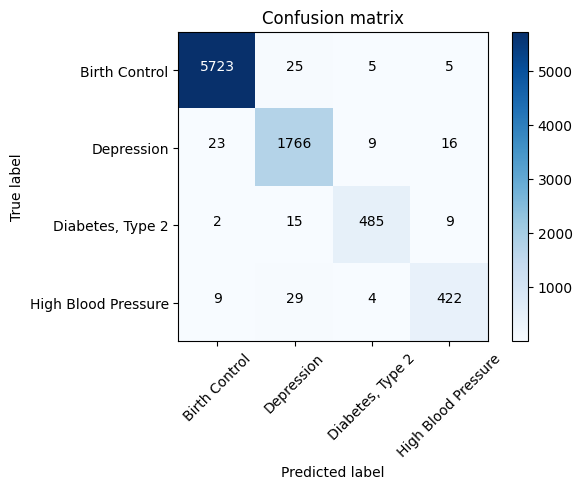

In [44]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf_m1 = PassiveAggressiveClassifier()
pass_tf_m1.fit(tfidf_train, y_train)
pred = pass_tf_m1.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])


### Accuracy with Passive Aggressive Classifier and TF-IDF

- **Passive Aggressive Classifier** with **TF-IDF** vectorization achieved an accuracy of **98.20%**.
- This model showed improved performance compared to other models, indicating its effectiveness in handling the classification problem with TF-IDF features.
- The Passive Aggressive Classifier proves to be quite accurate for this classification task.


### TF-IDF: Bigrams

- **Bigrams** in TF-IDF analysis consider pairs of words (2-word sequences) for feature extraction.
- This approach captures more context and relationships between words compared to unigrams (single words).
- Implementing bigrams with TF-IDF can potentially improve the model's performance by incorporating more nuanced information from the text.


In [45]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

accuracy:   0.985
Confusion matrix, without normalization


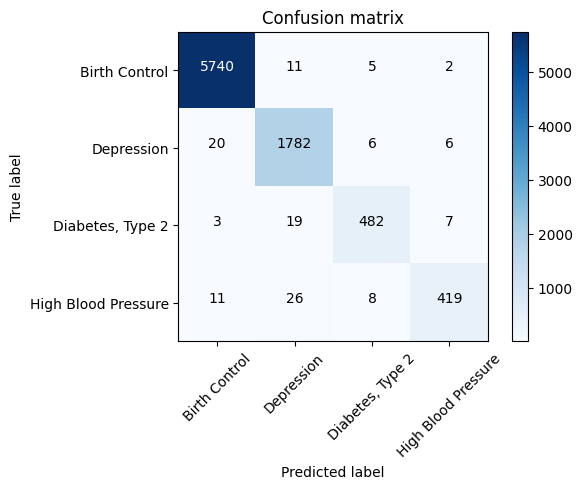

In [46]:
pass_tf_m2 = PassiveAggressiveClassifier()
pass_tf_m2.fit(tfidf_train_2, y_train)
pred = pass_tf_m2.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])


- **Conclusion:** Bigrams play a significant role in improving the model's performance for this use case.







### TFIDF : Trigrams


accuracy:   0.985
Confusion matrix, without normalization


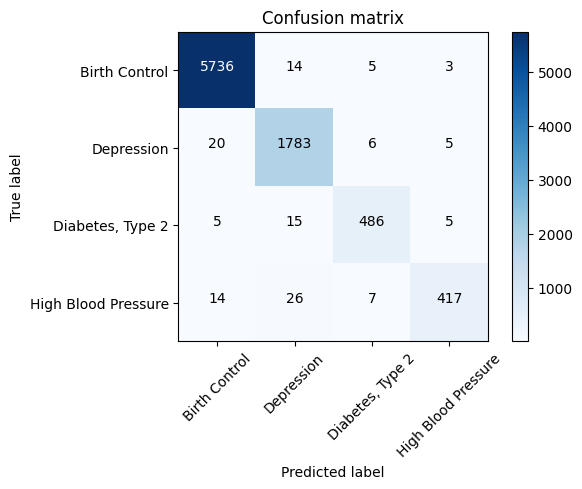

In [47]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf_m3 = PassiveAggressiveClassifier()
pass_tf_m3.fit(tfidf_train_3, y_train)
pred = pass_tf_m3.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])


### Most Important Features

- **Objective:** Identify the most important features using the TF-IDF vectorizer and Passive Aggressive Classifier.
- **Steps:**
  1. **TF-IDF Vectorizer:** Transform the text data into TF-IDF features.
  2. **Passive Aggressive Classifier:** Train the model using the TF-IDF features.
  3. **Feature Importance:** Analyze the feature importance to determine the top features for each category.
  
- **Outcome:** For each category, identify the top 10 features that significantly contribute to classifying sentences into that particular category.


In [48]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print(classlabel, feat, coef)


In [49]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf_m2, 'Birth Control')


Birth Control patch 4.429476241864536
Birth Control cramp 4.464867097899179
Birth Control spotting 4.559601475123013
Birth Control pregnant 5.0973520326567785
Birth Control bleeding 5.523460360383479
Birth Control birth control 5.98244096934644
Birth Control birth 6.187068949688831
Birth Control acne 6.602348743372272
Birth Control pill 7.231808466709096
Birth Control period 10.082665269238525


In [50]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf_m2, 'Depression')


Depression celexa 4.8201240497296745
Depression viibryd 4.851472033362943
Depression effexor 5.05069429918558
Depression prozac 5.154530429496376
Depression cymbalta 5.249304963083689
Depression lexapro 5.9259090754111705
Depression zoloft 6.243069438718011
Depression wellbutrin 6.410317943066642
Depression pristiq 6.97971884953814
Depression depression 7.215216842737363


In [51]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf_m2, 'High Blood Pressure')


High Blood Pressure medicine month 3.1380609086588707
High Blood Pressure diovan 3.1513122943165404
High Blood Pressure bystolic 3.4921521641041937
High Blood Pressure benicar 3.5393549118971754
High Blood Pressure losartan 3.7769118994537254
High Blood Pressure amlodipine 3.8540425625163603
High Blood Pressure cough 4.896286996677996
High Blood Pressure pressure 5.191769235252146
High Blood Pressure lisinopril 5.784986885472093
High Blood Pressure bp 7.406835487595267


In [52]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf_m2, 'Diabetes, Type 2')


Diabetes, Type 2 diabetes 4.030699886457181
Diabetes, Type 2 insulin 4.142142439157725
Diabetes, Type 2 januvia 4.24659348413476
Diabetes, Type 2 byetta 4.310987528127446
Diabetes, Type 2 injection 4.719581730989893
Diabetes, Type 2 invokana 5.1599917360733905
Diabetes, Type 2 trulicity 5.399598798668438
Diabetes, Type 2 victoza 6.802557089892704
Diabetes, Type 2 metformin 6.958417616053338
Diabetes, Type 2 sugar 7.164282941243384


### Sample Predictions


In [61]:
X.tail(2)


condition  \
161290  High Blood Pressure   
161291  Birth Control         

                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
161290  I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.   
161291  This would be my second month on Junel. I&#039;ve been on Birth Control for about 10 years now. I changed due to spotting and increased mood swings with my previous birth control. Since the switch I have had shorter periods about 2-3 days, but I have gained major weight and increased appetite. I switched up my regular exercise routine and still have not managed to drop the extra 7 lbs ;(                                           

                                                                                                                                                                                                                                                                       review_clean  
161290  tekturna day effect immediate also calcium channel blocker tiazac hydrochlorothiazide put tekturna palpitation experienced diovan ugly drug opinion company produce however palpitation pretty bad diovan hour monitor ekg etc day substituting tekturna diovan palpitation  
161291  would second month junel birth control year changed due spotting increased mood swing previous birth control since switch shorter period day gained major weight increased appetite switched regular exercise routine still managed drop extra lb

In [54]:
## Function for Extracting Top drugs
def top_drugs_extractor(condition):
    df_top = df_train[(df_train['rating']>=9)&(df_train['usefulCount']>=100)].sort_values(by = ['rating', 'usefulCount'], ascending = [False, False])
    drug_lst = df_top[df_top['condition']==condition]['drugName'].head(3).tolist()
    return drug_lst

In [55]:
def predict_text(lst_text):
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])
    df_test["test_sent"] = df_test["test_sent"].apply(review_to_words)
    tfidf_bigram = tfidf_vectorizer2.transform(lst_text)
    prediction = pass_tf.predict(tfidf_bigram)
    #accc=metrics.accuracy_score(df_test, prediction)
    df_test['prediction']=prediction
    return df_test

In [56]:
sentences = [
    "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.",
    
    "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.",
    
    "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me",
    
    "This medication helped me  sleep, but eventually it became ineffective as a sleep aid. It also helps me calm down when in severe stress, anxiety, or panic.",
    
  ]

In [57]:
# Transform the sentences using the tfidf_vectorizer
tfidf_bigram = tfidf_vectorizer2.transform(sentences)

# Predict the labels for the transformed sentences
predictions = pass_tf_m2.predict(tfidf_bigram)

# Iterate over each sentence and its predicted label
for text, label in zip(sentences, predictions):
    # Extract the top drugs for the predicted condition
    top_drugs = top_drugs_extractor(label)
    
    # Print the condition and corresponding details based on the label
    if label == "High Blood Pressure":
        target = "High Blood Pressure"
    elif label == "Depression":
        target = "Depression"
    elif label == "Diabetes, Type 2":
        target = "Diabetes, Type 2"
    else:
        target = "Birth Control"
    
    # Print the details for each sentence
    print(f"text: {text}\nCondition: {target}")
    print("Top 3 Suggested Drugs:")
    print(top_drugs[0])
    print(top_drugs[1])
    print(top_drugs[2])
    print()


text: I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.
Condition: High Blood Pressure
Top 3 Suggested Drugs:
Losartan
Aldactone
Spironolactone

text: This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.
Condition: Depression
Top 3 Suggested Drugs:
Sertraline
Zoloft
Viibryd

text: I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing

### Model and Vectorizer Serialization

- **Objective:** Serialize the Passive Aggressive Classifier and TF-IDF vectorizer for reuse on other platforms.
- **Tools:** `joblib` library
- **Steps:**
  1. **Serialization:** Use `joblib` to save the trained Passive Aggressive Classifier and TF-IDF vectorizer to disk.
  2. **TF-IDF Vectorizer:** Ensure that the vectorizer is set up to handle bigrams, as it performed better in previous evaluations.
  3. **Deserialization:** The serialized model and vectorizer can be loaded and used across different machines, web applications, or mobile applications.


In [59]:
import joblib
joblib.dump(tfidf_vectorizer2, 'tfidfvectorizer.joblib')
joblib.dump(pass_tf_m2, 'passmodel.joblib')

['passmodel.joblib']